# 1. Importation de Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 2. Chargement de données

In [5]:
# import data
data = pd.read_csv("../data/Real-estate.csv")


In [6]:
data.head()


,No,X1 date de transaction,X2 age de la maison,X3 distance jusqu'a la gare la plus proche,X4 nombre de supermarket de proximite,X5 latitude,X6 longitude,Y prix de la maison par unite de surface
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# 3. Exploration de données

In [8]:
data.shape

(414, 8)

In [9]:
data.columns

Index(['No', 'X1 date de transaction', 'X2 age de la maison',
       'X3 distance jusqu'a la gare la plus proche',
       'X4 nombre de supermarket de proximite', 'X5 latitude', 'X6 longitude',
       'Y prix de la maison par unite de surface'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   No                                          414 non-null    int64  
 1   X1 date de transaction                      414 non-null    float64
 2   X2 age de la maison                         414 non-null    float64
 3   X3 distance jusqu'a la gare la plus proche  414 non-null    float64
 4   X4 nombre de supermarket de proximite       414 non-null    int64  
 5   X5 latitude                                 414 non-null    float64
 6   X6 longitude                                414 non-null    float64
 7   Y prix de la maison par unite de surface    414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [11]:
data.isnull().sum()

No                                            0
X1 date de transaction                        0
X2 age de la maison                           0
X3 distance jusqu'a la gare la plus proche    0
X4 nombre de supermarket de proximite         0
X5 latitude                                   0
X6 longitude                                  0
Y prix de la maison par unite de surface      0
dtype: int64

# 4 Division de données en Variable Independante et Dependante

In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1].values


In [14]:
X

,No,X1 date de transaction,X2 age de la maison,X3 distance jusqu'a la gare la plus proche,X4 nombre de supermarket de proximite,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [15]:
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

# 5 Sepration de données Train data & Test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [17]:
#affichage de dimension
print("X train :", X_train.shape)
print("X train :", y_train.shape)

X train : (331, 7)
X train : (331,)


In [18]:
print("X train :", X_test.shape)
print("X train :", y_test.shape)

X train : (83, 7)
X train : (83,)


# 6 Création du modele

## 6.1 Linear Regression : Regression Lineaire

In [19]:
model_Lineaire = LinearRegression()


In [20]:
# Entrainement du modele
model_Lineaire.fit(X_train, y_train)


LinearRegression()

In [21]:
y_pred = model_Lineaire.predict(X_test)

In [22]:
df = pd.DataFrame({'Real Values': y_test, 'Prediction Values': y_pred})
df

,Real Values,Prediction Values
0,29.8,33.973895
1,25.0,41.721454
2,45.1,14.806437
3,29.3,42.366150
4,25.5,33.402587
...,...,...
78,34.7,36.141845
79,73.6,51.643370
80,14.4,12.887844
81,14.7,13.148005


In [23]:
mean_squared_error(y_test, y_pred)

98.15840184153122

In [24]:
r2_score(y_test, y_pred)

0.46170827406789305

In [25]:
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("R2_Score :", r2_score(y_test, y_pred))

Mean Squared Error : 98.15840184153122
R2_Score : 0.46170827406789305


# Visualition de la prediction

In [28]:
# Prédictions sur les données d'entraînement et de test
y_train_pred = model_Lineaire.predict(X_train)
y_test_pred = model_Lineaire.predict(X_test)

In [29]:
# Visualisation des résultats
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

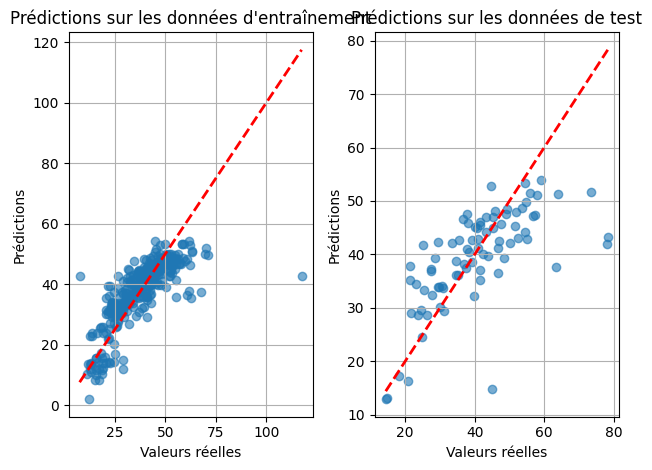

In [30]:
# Visualisation pour les données d'entraînement
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Prédictions sur les données d\'entraînement')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.grid()

# Visualisation pour les données de test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Prédictions sur les données de test')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.grid()

plt.tight_layout()
plt.show()